In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_bank = pd.read_csv('datasets/bank-marketing.csv')
df_bio = pd.read_csv('datasets/bio-response.csv')
df_blood = pd.read_csv('datasets/blood-transfusion-service-center.csv')
df_breast_cancer = pd.read_csv('datasets/breast-cancer.csv')
df_climate = pd.read_csv('datasets/climate-model-simulation-crashes.csv')
df_credit = pd.read_csv('datasets/credit-g.csv')
df_diabetes = pd.read_csv('datasets/diabetes.csv')
df_eucalyptus = pd.read_csv('datasets/eucalyptus.csv')
df_iris = pd.read_csv('datasets/iris.csv')
df_phishing = pd.read_csv('datasets/phishing-websites.csv')
df_transplant = pd.read_csv('datasets/transplant.csv')

In [4]:
# Function to perform EDA with graphical representations
def perform_eda(df, target_column=None):
    # Display basic information about the dataset
    print("Basic Information:")
    print(df.info())
    print("\n")

    # Display statistical summary
    print("Statistical Summary:")
    print(df.describe(include='all'))
    print("\n")

    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n")

    # Display the first few rows of the dataset
    print("First 5 Rows:")
    print(df.head())
    print("\n")

    # Display the data types of each column
    print("Data Types:")
    print(df.dtypes)
    print("\n")

    # Pairplot for quick visualization of feature relationships
    if target_column:
        sns.pairplot(df, hue=target_column)
    else:
        sns.pairplot(df)
    plt.show()

    # Check for class balance if it's a classification problem
    if target_column:
        print("Class Balance:")
        print(df[target_column].value_counts(normalize=True))
        print("\n")

        # Plot class distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=target_column)
        plt.title("Class Distribution")
        plt.show()


## df_bank

In [5]:
df_bank.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


In [7]:
df_bank.rename(columns={
    'V1': 'age',
    'V2': 'job',
    'V3': 'marital status',
    'V4': 'education',
    'V5': 'credit_default',
    'V6': 'balance',
    'V7': 'housing_loan',
    'V8': 'personal_loan',
    'V9': 'contact_type',
    'V10': 'day',
    'V11': 'month',
    'V12': 'duration_contact',
    'V13': 'campaign',
    'V14': 'pday',
    'V15': 'previous',
    'V16': 'poutcame',
    'Class': 'Target',
}, inplace=True)

In [8]:
df_bank.head()

,age,job,marital status,education,credit_default,balance,housing_loan,personal_loan,contact_type,day,month,duration_contact,campaign,pday,previous,poutcame,Target
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45211 non-null  float64
 1   job               45211 non-null  object 
 2   marital status    45211 non-null  object 
 3   education         45211 non-null  object 
 4   credit_default    45211 non-null  object 
 5   balance           45211 non-null  float64
 6   housing_loan      45211 non-null  object 
 7   personal_loan     45211 non-null  object 
 8   contact_type      45211 non-null  object 
 9   day               45211 non-null  float64
 10  month             45211 non-null  object 
 11  duration_contact  45211 non-null  float64
 12  campaign          45211 non-null  float64
 13  pday              45211 non-null  float64
 14  previous          45211 non-null  float64
 15  poutcame          45211 non-null  object 
 16  Target            452

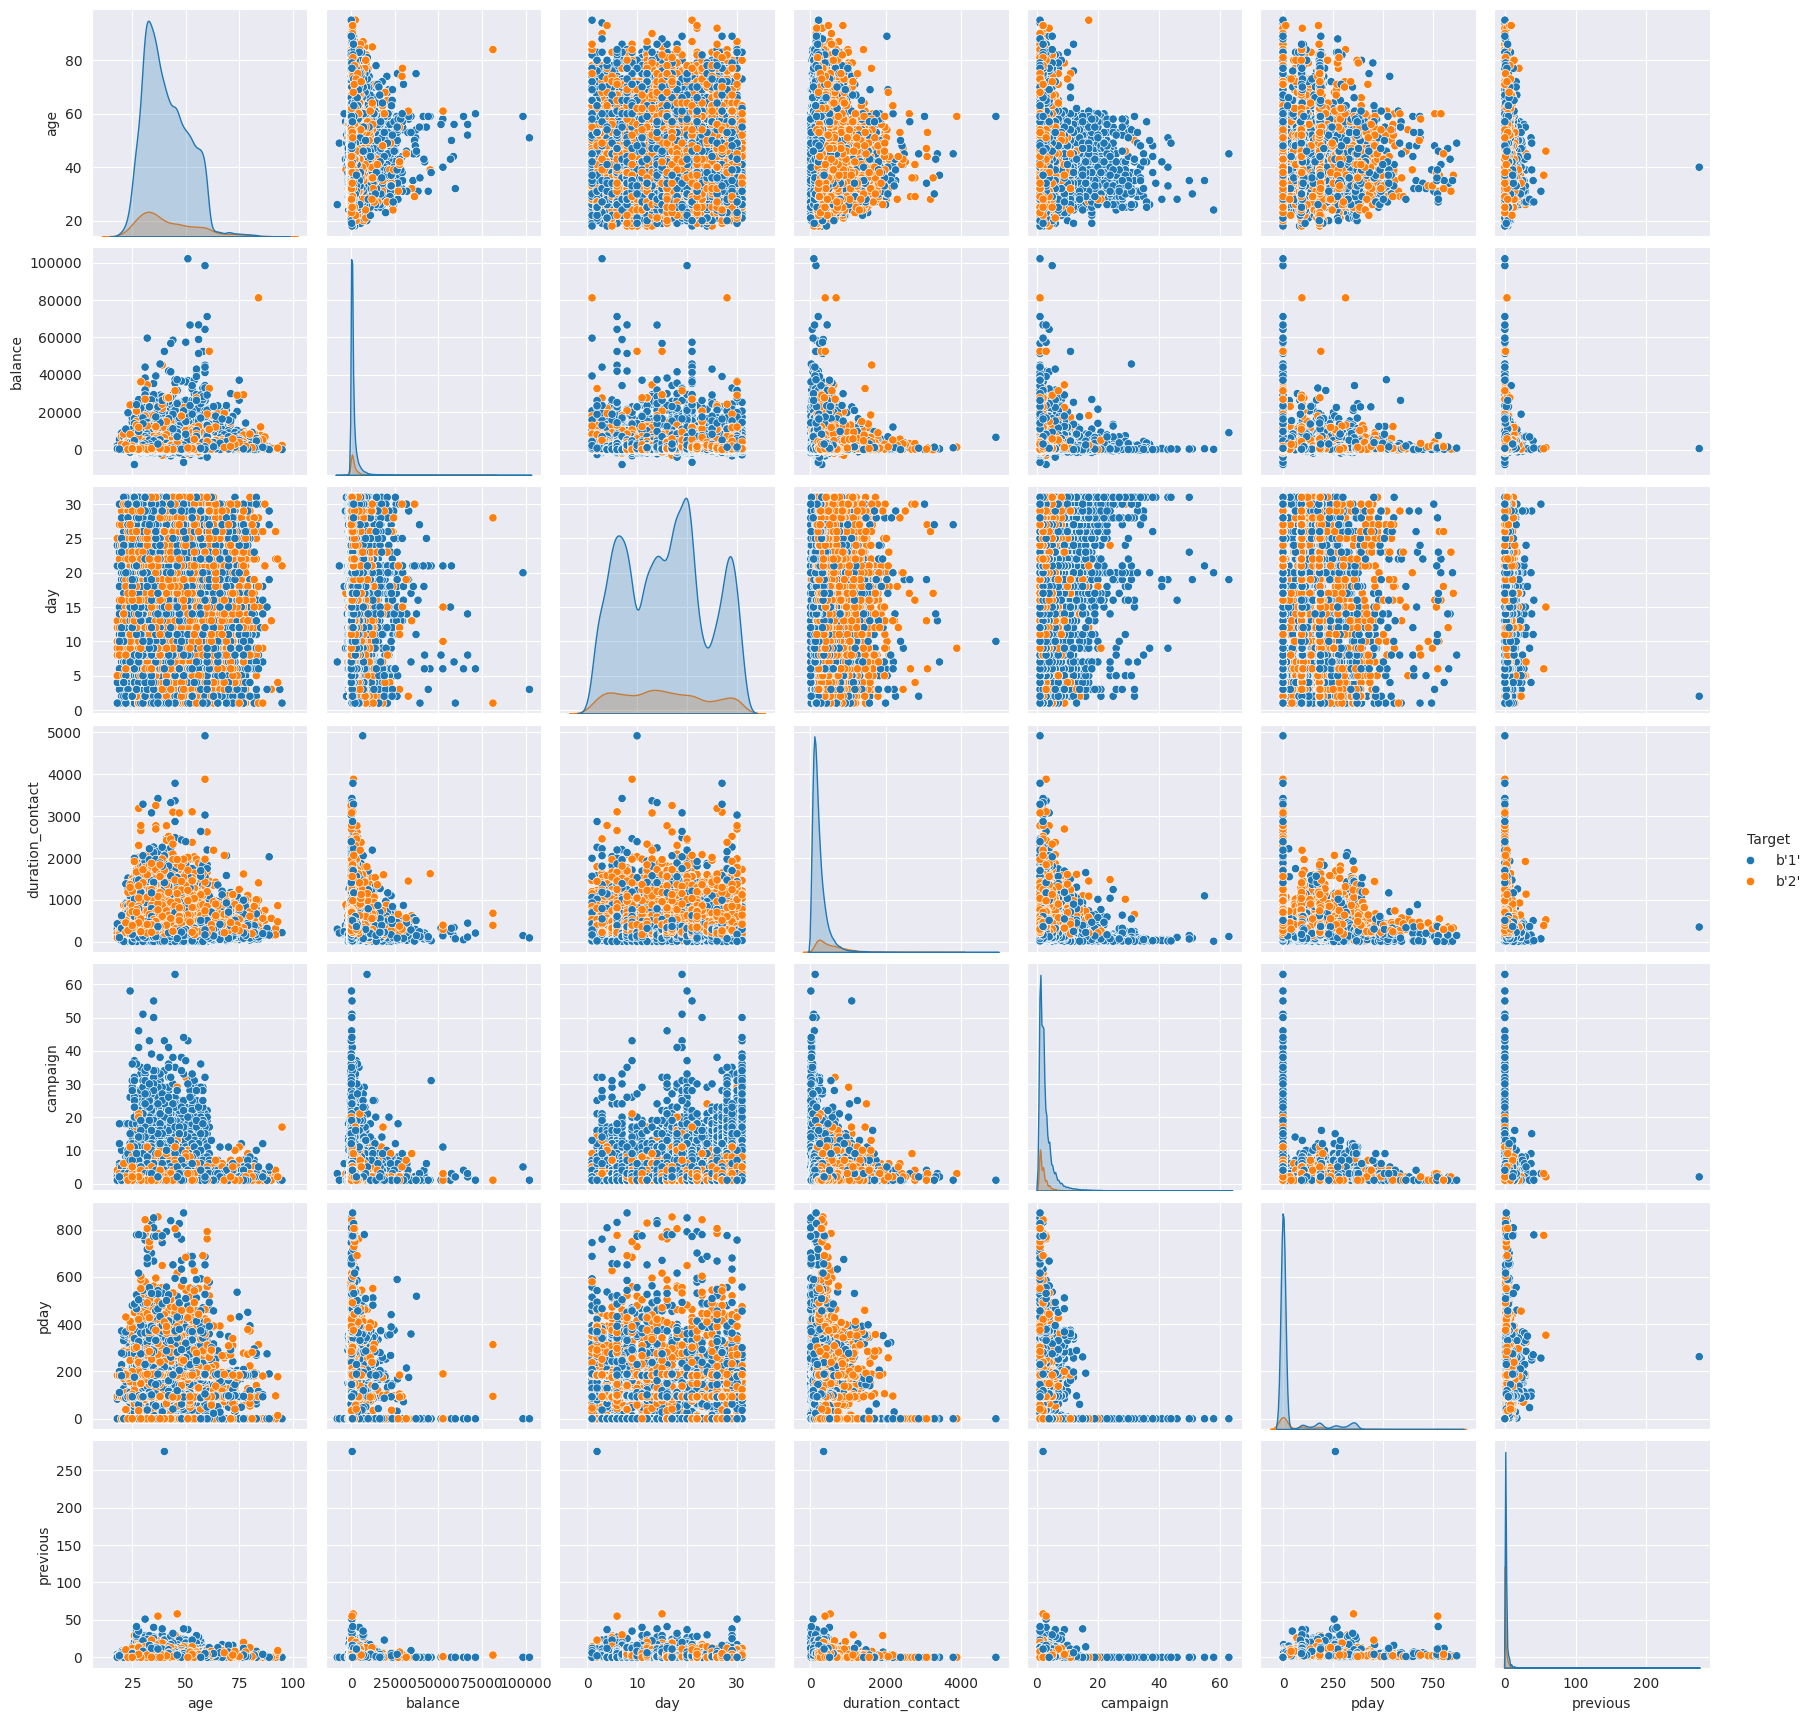

Class Balance:
Target
b'1'    0.883015
b'2'    0.116985
Name: proportion, dtype: float64




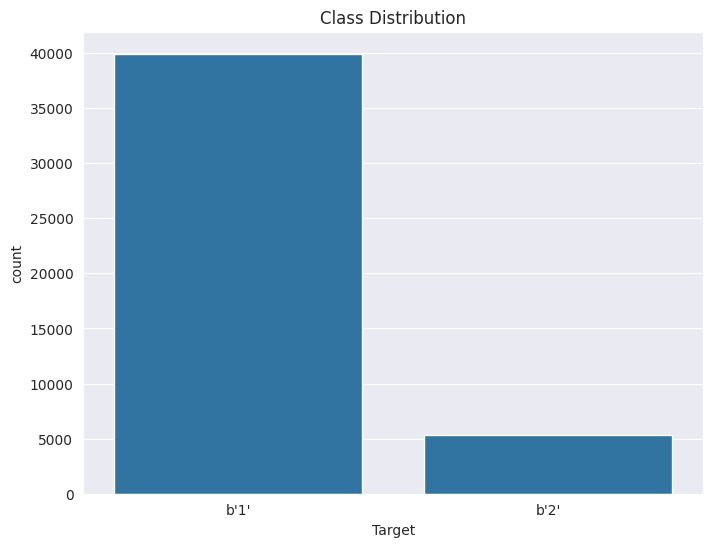

In [9]:
perform_eda(df_bank, target_column='Target')

## df_bio

In [10]:
df_bio.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,b'1'
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


For this dataset, since each feature represents a molecule, there is no point in changing the columns' names, as they are already in a suitable format. The target, represents if there was a biological response(1) or not(0).

In [ ]:
df_bio.rename(columns={
    'target': 'Target'
}, inplace=True)

In [ ]:
perform_eda(df_bio, target_column='Target')

## df_blood

In [11]:
df_blood.head()

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'


The target in this dataset is the column that represents if the person donated(2) blood in March 2007 or not(1). To make the Target column more intuive, we decided to change te value 2 to 1 and 1 to 0.

In [ ]:
df_blood.rename(columns={
    'V1': 'recency',
    'V2': 'frequency',
    'V3': 'monetary',
    'V4': 'time',
    'Class': 'Target',
}, inplace=True)

df_blood['Target'] = df_blood['Target'].replace({2: 1, 1: 0})

In [ ]:
df_blood.head()

In [ ]:
perform_eda(df_blood, target_column='Target')

## df_breast_cancer

In [12]:
df_breast_cancer.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,b'40-49',b'premeno',b'15-19',b'0-2',b'yes',b'3',b'right',b'left_up',b'no',b'recurrence-events'
1,b'50-59',b'ge40',b'15-19',b'0-2',b'no',b'1',b'right',b'central',b'no',b'no-recurrence-events'
2,b'50-59',b'ge40',b'35-39',b'0-2',b'no',b'2',b'left',b'left_low',b'no',b'recurrence-events'
3,b'40-49',b'premeno',b'35-39',b'0-2',b'yes',b'3',b'right',b'left_low',b'yes',b'no-recurrence-events'
4,b'40-49',b'premeno',b'30-34',b'3-5',b'yes',b'2',b'left',b'right_up',b'no',b'recurrence-events'


<bound method DataFrame.info of           age   menopause tumor-size inv-nodes node-caps deg-malig    breast  \
0    b'40-49'  b'premeno'   b'15-19'    b'0-2'    b'yes'      b'3'  b'right'   
1    b'50-59'     b'ge40'   b'15-19'    b'0-2'     b'no'      b'1'  b'right'   
2    b'50-59'     b'ge40'   b'35-39'    b'0-2'     b'no'      b'2'   b'left'   
3    b'40-49'  b'premeno'   b'35-39'    b'0-2'    b'yes'      b'3'  b'right'   
4    b'40-49'  b'premeno'   b'30-34'    b'3-5'    b'yes'      b'2'   b'left'   
..        ...         ...        ...       ...       ...       ...       ...   
281  b'50-59'     b'ge40'   b'30-34'    b'6-8'    b'yes'      b'2'   b'left'   
282  b'50-59'  b'premeno'   b'25-29'    b'3-5'    b'yes'      b'2'   b'left'   
283  b'30-39'  b'premeno'   b'30-34'    b'6-8'    b'yes'      b'2'  b'right'   
284  b'50-59'  b'premeno'   b'15-19'    b'0-2'     b'no'      b'2'  b'right'   
285  b'50-59'     b'ge40'   b'40-44'    b'0-2'     b'no'      b'3'   b'left'   

     br

In [ ]:
df_bio.rename(columns={
    'Class': 'Target'
}, inplace=True)

In [ ]:
# Criação de um objeto LabelEncoder
le = LabelEncoder()

# Obter o nome da última coluna
last_column = df_bank.columns[-1]

# Aplicar LabelEncoder à última coluna
df_bank[last_column] = le.fit_transform(df_bank[last_column])

In [ ]:
df_bank

In [ ]:
df_bank.info()

In [ ]:
df_bank.describe()

In [ ]:
df_bank[df_bank.columns[-1]].value_counts()

In [ ]:
df_bank.hist(figsize=(10, 8))
plt.show()

In [ ]:
sns.countplot(x='Class', data=df_bank)
plt.show()

In [ ]:
sns.boxplot(x='Class', data=df_bank)
plt.show()

In [ ]:
sns.pairplot(df_bank)
plt.show()